# Defeito

# Metodologia par o defeito:

As construções são as mesmas, mas incluímos um "if" para modificar a primeira partícula.

In [75]:
import numpy as np
import matplotlib.pyplot as plt

In [76]:
#define os valores de  massa e da constante elástica:
massa = 1
k = 1
n = int(input())

#constroi as matrizes com defeito m2=5
a = []
for z in range(0,n):
    a.append(z)
#print(a)


matriz_massa =[]
matriz_k = []
matriz = []
for z in range (0,n):
    matriz_massa.append([])
    matriz_k.append([])
    matriz.append([])
    for y in range(0,n):
        matriz_k[z].append(k)
        matriz[z].append(0)

        #aplica o defeito na matriz_massa
        if z == 1:
            matriz_massa[z].append(5)
        else:
            matriz_massa[z].append(massa)

In [77]:
#calcula os autovalores para um n definido na celula anterior em um 
# sistema homogeneo em que o a ultima massa está ligada a primeira.

a = []
for z in range(0,n):
    a.append(z)
#print(a)


for i in range(0,len(a)):
    for j in range (0,len(a)):

        if i==(j%len(a)):
            matriz[i][j] = ((matriz_k[i][(j-1)%len(a)] + matriz_k[i][(j+1)%len(a)]) / matriz_massa[i][j])
        
        if i==((j-1)%len(a)):
            matriz[i][j] = -1*(matriz_k[i][j]) / (matriz_massa[i][j])
        
        if i==((j+1)%len(a)):
            matriz[i][j] = -1*(matriz_k[i][j]) / (matriz_massa[i][j])



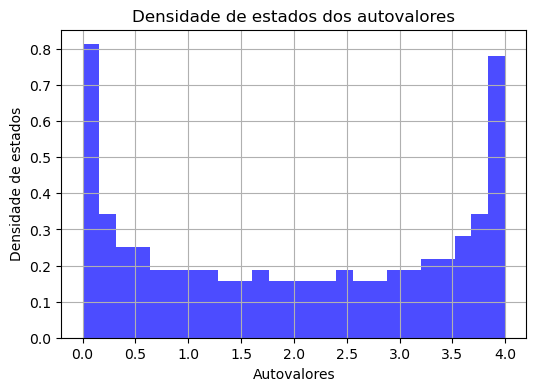

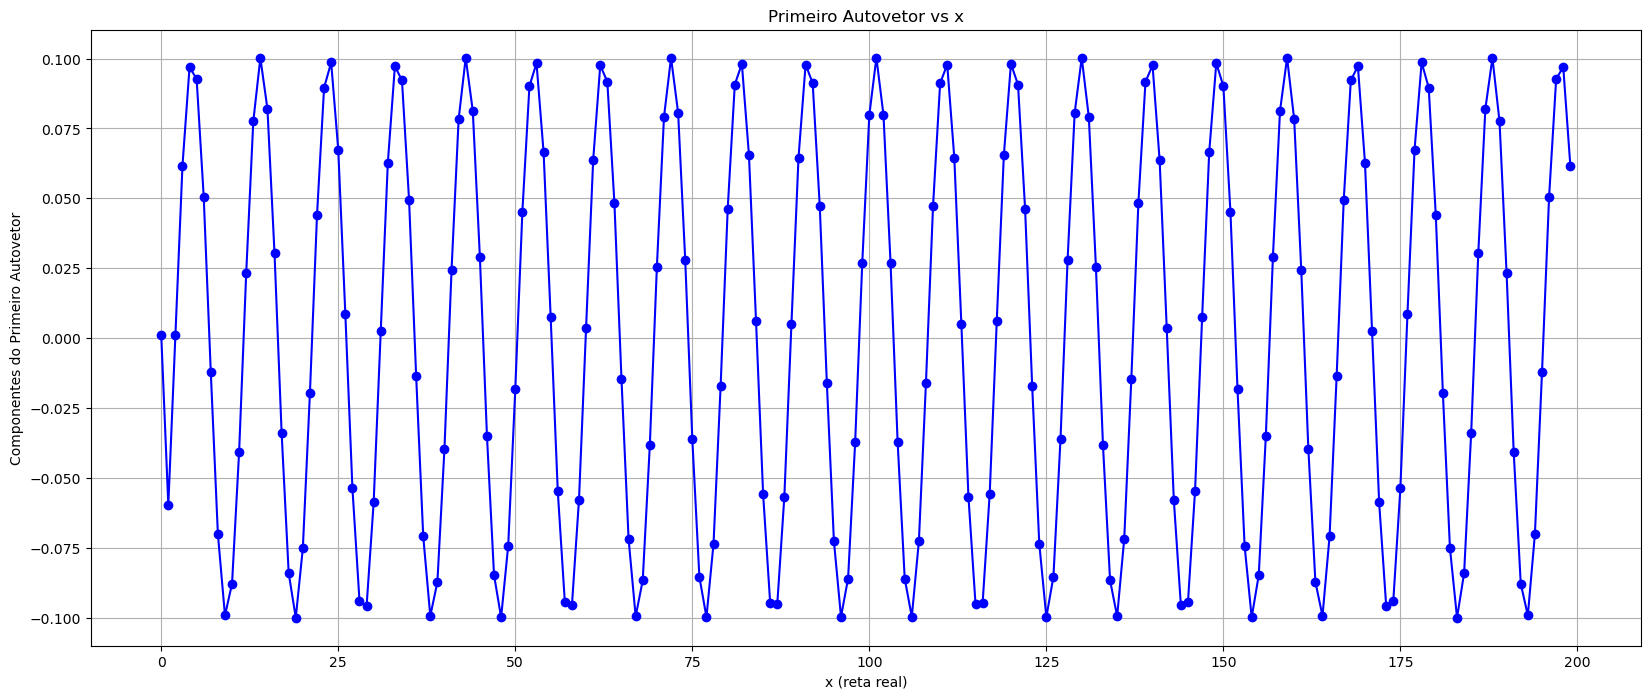

In [78]:
import matplotlib.pyplot as plt

# Calcula os autovalores da matriz
autovalores, autovetores  = np.linalg.eig(matriz)

autovalores.argsort()
autovetores.T
#print("autovetores:", autovetores[:,-1])


# Plota a densidade de estados (histograma dos autovalores)
plt.figure(figsize=(6,4))
plt.hist(autovalores, bins=25, density=True, alpha=0.7, color='blue')
plt.xlabel('Autovalores')
plt.ylabel('Densidade de estados')
plt.title('Densidade de estados dos autovalores')
plt.grid(True)
plt.show()


# Plota o primeiro autovetor em função de uma reta real x
x = np.arange(n)
plt.figure(figsize=(20,8))
plt.plot(x, autovetores[:,-1], marker='o', linestyle='-', color='blue')
plt.xlabel('x (reta real)')
plt.ylabel('Componentes do Primeiro Autovetor')
plt.title('Primeiro Autovetor vs x')
plt.grid(True)
plt.show()

In [79]:
print("autovetores:", autovetores[:,-1])

autovetores: [ 0.00124346 -0.05974803  0.00124346  0.06172721  0.09700622  0.09267519
  0.0505026  -0.01229145 -0.0700666  -0.09923183 -0.08787825 -0.04064182
  0.02318967  0.07755225  0.10024833  0.08201054  0.03028583 -0.03380534
 -0.08409295 -0.10004333 -0.07514356 -0.01956081  0.04400909  0.089609
  0.09861934  0.06736097  0.00859745 -0.05367662 -0.0940332  -0.09599371
 -0.05875762  0.00247066  0.0626901   0.09731163  0.09219842  0.04943832
 -0.01350867 -0.07093973 -0.09940435 -0.08727972 -0.03951663  0.02438208
  0.07832499  0.10028586  0.08129755  0.02911344 -0.03495841 -0.08475587
 -0.09994542 -0.07432479 -0.01835552  0.04510877  0.09015404  0.09838718
  0.06644641  0.00737394 -0.0547095  -0.0944537  -0.09563012 -0.05775841
  0.00369749  0.06364361  0.09760248  0.09170784  0.04836663 -0.01472387
 -0.07180225 -0.099562   -0.08666813 -0.03838552  0.02557084  0.079086
  0.10030839  0.08057239  0.0279367  -0.03610624 -0.08540611 -0.09983256
 -0.07349491 -0.01714747  0.0462017   0.09

# Resultados

Observe-se que, o sistema homogêneo em comparação com o sistema com defeito apresenta menor comprimento de onda:

Homogêneo:
![alt text](image-5.png)

Defeito:
![alt text](image-6.png)